### I. Cài đặt thư viện

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.8.2
Eager execution: True


### II. Tải dữ liệu

In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

16384/2194 [================================================================================================================================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [5]:
train_dataset_fp

'/root/.keras/datasets/iris_training.csv'

In [6]:
import pandas as pd

In [7]:
train_df = pd.read_csv(train_dataset_fp)

Dòng đầu tiên bao gồm các giá trị:
- 120: Số dòng
- 4: số cột
- 3 nhãn `[0, 1, 2]` đại diện cho 3 loài hoa tương ứng: `['Iris setosa', 'Iris versicolor', 'Iris virginica']`

In [8]:
train_df

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


Tạo tf dataset từ csv

In [9]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


### III. Xây dựng tensorflow dataset từ csv 

In [10]:
batch_size = 32
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [11]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.2, 4.9, 7.4, 5.3, 6.1, 6.1, 6. , 6.3, 5.6, 5.5, 6.5, 5. , 6.3,
       6.9, 4.4, 4.8, 5.2, 6.3, 5.9, 5.7, 5. , 4.5, 7.6, 6.1, 6.4, 4.6,
       5. , 5.8, 5.6, 5. , 5.1, 6.5], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.2, 2.5, 2.8, 3.7, 2.8, 2.8, 2.7, 2.3, 2.7, 3.5, 2.8, 3.4, 3.3,
       3.1, 3.2, 3. , 3.5, 3.3, 3. , 3.8, 3.5, 2.3, 3. , 3. , 2.8, 3.6,
       3.3, 2.7, 2.5, 3. , 3.8, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.5, 4.5, 6.1, 1.5, 4. , 4.7, 5.1, 4.4, 4.2, 1.3, 4.6, 1.6, 4.7,
       5.1, 1.3, 1.4, 1.5, 6. , 5.1, 1.7, 1.3, 1.3, 6.6, 4.9, 5.6, 1. ,
       1.4, 5.1, 3.9, 1.6, 1.9, 5.2], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 1.7, 1.9, 0.2, 1.3, 1.2, 1.6, 1.3, 1.3, 0.2, 1.5, 0.4, 1.6,
       2.3, 0.2, 0.3, 0.2, 2.5, 1.8, 0.3, 0.3, 0.3, 2.1, 1.8,

In [12]:
# Một cách khác
# list(train_dataset.take(1))

Hiển thị dữ liệu

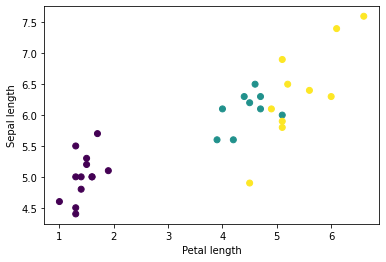

In [13]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

Hiện tại trong dataset các cột đang tách rời nhau, ta sẽ sử dụng hàm stack để ghép các cột

In [14]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [15]:
train_dataset = train_dataset.map(pack_features_vector)

Kiểm tra kết quả sau khi ghép

In [16]:
features, labels = next(iter(train_dataset))

print(features)

tf.Tensor(
[[5.1 3.8 1.6 0.2]
 [7.7 2.6 6.9 2.3]
 [6.8 3.  5.5 2.1]
 [6.2 2.2 4.5 1.5]
 [6.1 3.  4.9 1.8]
 [5.2 2.7 3.9 1.4]
 [4.8 3.  1.4 0.3]
 [6.4 3.2 4.5 1.5]
 [4.8 3.  1.4 0.1]
 [5.8 2.8 5.1 2.4]
 [5.1 3.8 1.9 0.4]
 [5.8 2.7 5.1 1.9]
 [6.3 2.3 4.4 1.3]
 [5.5 2.4 3.8 1.1]
 [5.5 2.4 3.7 1. ]
 [4.6 3.4 1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [4.6 3.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.3 3.7 1.5 0.2]
 [6.4 3.2 5.3 2.3]
 [5.6 2.7 4.2 1.3]
 [5.7 2.9 4.2 1.3]
 [6.8 2.8 4.8 1.4]
 [7.7 2.8 6.7 2. ]
 [5.  3.3 1.4 0.2]
 [6.4 2.8 5.6 2.1]
 [6.3 2.5 5.  1.9]
 [6.9 3.1 4.9 1.5]
 [5.  2.  3.5 1. ]
 [4.9 3.1 1.5 0.1]
 [4.9 3.1 1.5 0.1]], shape=(32, 4), dtype=float32)


### IV. Xây dựng mô hình bao gồm
- 2 tầng ẩn mỗi tầng có 10 nơ ron + activation là relu
- Lớp Softmax phân loại thành 3 nhãn

In [17]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2) ,
  tf.keras.layers.Dense(3)
])

Định nghĩa hàm mất mát

In [18]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)
  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.524988055229187


Định nghĩa thuật toán tối ưu

In [20]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

Định nghĩa quá trình tính Loss Function + Gradient

In [21]:
model.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[ 0.09351569, -0.23833457, -0.5855651 , -0.37529898, -0.5215618 ,
         -0.22230327, -0.39395165, -0.14856583, -0.0894137 , -0.32268652],
        [ 0.18757123, -0.19678283, -0.29019535, -0.47739244,  0.39692783,
          0.18233252,  0.5360515 ,  0.43907964,  0.54864573, -0.23439196],
        [-0.23949239, -0.48118693, -0.07327139, -0.41098768, -0.41422746,
         -0.24711165,  0.1295287 , -0.39243424,  0.64311445,  0.3647524 ],
        [ 0.15305048,  0.635604  , -0.22821066,  0.5340353 ,  0.1816932 ,
          0.490301  ,  0.07602876,  0.09852368,  0.3275655 ,  0.20681876]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[ 0.51713943, -0.54230255, -0.00974977,  0.18604779,  0.35536128,
          0.05639958,  0.25842547,  0.399

In [22]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

Thử nghiệm quá trình này

In [23]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.6099156141281128
Step: 1,         Loss: 1.7691843509674072


### V. Tiến hành training

In [24]:

train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # lặp qua các batch và đổ vào mô hình
  for x, y in train_dataset:
    # Tính gradient
    loss_value, grads = grad(model, x, y)

    # Cập nhật tham số của mô hình thông qua Gradient
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Tính giá trị sai lệch
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    
    # Tính độ chính xác
    epoch_accuracy.update_state(y, model(x, training=True))
  
  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.666, Accuracy: 37.500%
Epoch 050: Loss: 0.523, Accuracy: 72.500%
Epoch 100: Loss: 0.434, Accuracy: 84.167%
Epoch 150: Loss: 0.375, Accuracy: 88.333%
Epoch 200: Loss: 0.296, Accuracy: 90.833%


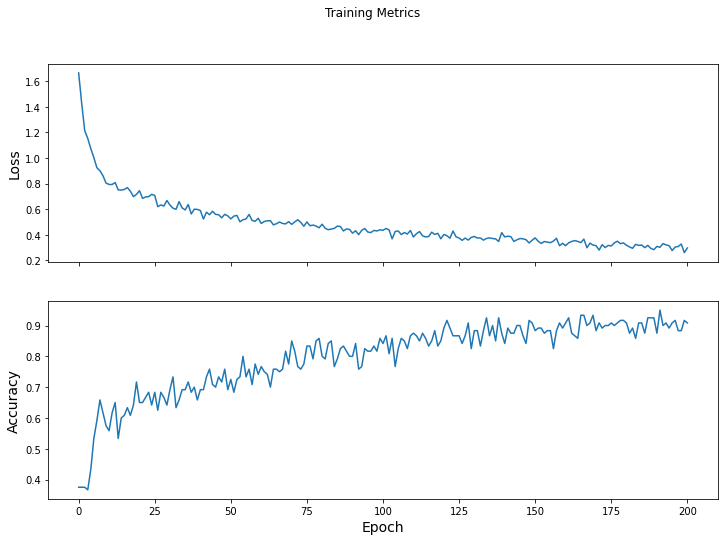

In [25]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

### VI. Hiển thị quá trình training

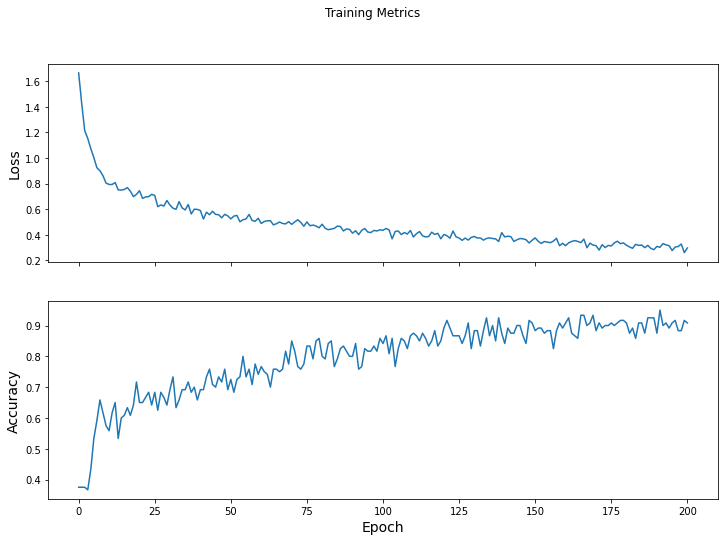

In [26]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()